#### SETUP

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('foodhub_order.csv')

##### Q1: Select all the customers that ordered cuisine type American

In [15]:
df.query("cuisine_type == 'American'").customer_id.reset_index()

,index,customer_id
0,3,106968
1,4,76942
2,12,129969
3,14,62667
4,15,66222
...,...,...
579,1885,97324
580,1886,48282
581,1887,237616
582,1891,138586


#####  Q2: SELECT ALL THE RESTAURANTS WHOSE RATING COUNT IS GREATER THAN 10 AND RATING MEAN GREATER THAN THE AVERAGE RATING MEAN OF ALL THE RESTAURANT

In [16]:
df.rating = df.rating.replace('Not given',np.nan)

In [17]:
df = df.astype({'rating':'float'})

In [10]:
#df.groupby('restaurant_name').sum('rating').sort_values(by = 'rating' ,ascending = False)

In [185]:
mean_table = df

In [186]:
mean_table['rating_mean'] = mean_table.rating / len(mean_table.rating)

In [187]:
mean_table

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_mean
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,NaN
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,0.002634
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,0.001581
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,0.002107
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17,0.002634
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19,0.002634
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24,NaN
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.0,23,31,0.002634


In [191]:
mean_table['sum_avg_mean'] = (mean_table.rating_mean.sum())/len(mean_table.rating_mean)

In [192]:
mean_table

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_mean,sum_avg_mean
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,NaN,0.001401
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,NaN,0.001401
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,0.002634,0.001401
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,0.001581,0.001401
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,0.002107,0.001401
...,...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17,0.002634,0.001401
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19,0.002634,0.001401
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24,NaN,0.001401
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.0,23,31,0.002634,0.001401


In [ ]:
mean_table.groupby("restaurant_name").sum('rating').query("`rating` > 10 and `rating_mean` > `sum_avg_mean").sort_values(by = 'rating' , ascending = False)# and `rating_mean` > `sum_avg_mean`")

In [236]:
rating_sum = mean_table.groupby("restaurant_name").sum('rating').query("`rating` > 10").sort_values(by = 'rating' , ascending = False)# and `rating_mean` > `sum_avg_mean`")
rsum = rating_sum.loc[:,['rating']]

In [239]:
rsum = rsum.reset_index()

In [240]:
rsum.rating

0     569.0
1     379.0
2     308.0
3     277.0
4     174.0
      ...  
67     13.0
68     13.0
69     12.0
70     12.0
71     11.0
Name: rating, Length: 72, dtype: float64

##### Q3: WHICH DAY OF THE WEEK HAS THE MOST OTHER FOR THAI FOOD

In [190]:
df[df.cuisine_type == "Thai"].day_of_the_week.value_counts().plot(kind = 'bar')

In [254]:
df.query("cuisine_type == 'Thai'").value_counts().groupby("day_of_the_week").sum()

day_of_the_week
Weekday    1
Weekend    8
dtype: int64

In [148]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_mean,sum_avg_mean
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,NaN,0.001401
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,NaN,0.001401
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,0.002634,0.001401
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,0.001581,0.001401
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,0.002107,0.001401
...,...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17,0.002634,0.001401
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19,0.002634,0.001401
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24,NaN,0.001401
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.0,23,31,0.002634,0.001401


In [241]:
df_counts = df.restaurant_name.value_counts().reset_index()

In [242]:
df_counts.columns = ['restaurant_name','counts']

In [243]:
df_counts['rating_sum'] = rsum.rating

In [248]:
df_counts

,restaurant_name,counts,rating_sum
0,Shake Shack,219,569.0
1,The Meatball Shop,132,379.0
2,Blue Ribbon Sushi,119,308.0
3,Blue Ribbon Fried Chicken,96,277.0
4,Parm,68,174.0
...,...,...,...
173,Sushi Choshi,1,NaN
174,Dos Caminos Soho,1,NaN
175,La Follia,1,NaN
176,Philippe Chow,1,NaN


#####  Q2: SELECT ALL THE RESTAURANTS WHOSE RATING COUNT IS GREATER THAN 10 AND RATING MEAN GREATER THAN THE AVERAGE RATING MEAN OF ALL THE RESTAURANT

<Axes: >

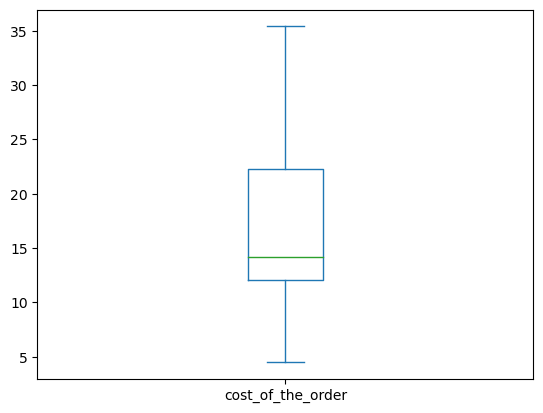

In [24]:
df.cost_of_the_order.plot(kind = "box")

In [20]:
df.cost_of_the_order.describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

In [23]:
df.cost_of_the_order.quantile()

14.14